In [3]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import requests
from tqdm import tqdm
import os

# File URL and save location
url = "https://datasets.cellxgene.cziscience.com/d25acbe9-9804-48ba-9e40-10beee03eb25.h5ad"
save_dir = "data/"
filename = "dataset.h5ad"

# Make sure the directory exists
os.makedirs(save_dir, exist_ok=True)
filepath = os.path.join(save_dir, filename)

# Stream download
response = requests.get(url, stream=True)
response.raise_for_status()

# Total size in bytes
total_size = int(response.headers.get("Content-Length", 0))
block_size = 1024  # 1 KB

# Progress bar
with open(filepath, "wb") as file, tqdm(
    total=total_size, unit="B", unit_scale=True, desc=filename
) as progress_bar:
    for data in response.iter_content(block_size):
        file.write(data)
        progress_bar.update(len(data))

print(f"Download complete: {filepath}")

dataset.h5ad: 100%|██████████| 6.51G/6.51G [04:05<00:00, 26.5MB/s]  

Download complete: data/dataset.h5ad


In [1]:
import scanpy as sc

# Load the file
adata = sc.read_h5ad("data/dataset.h5ad")

In [2]:
diseased = adata.obs[adata.obs["disease"] == "Alzheimer disease"]
normal = adata.obs[adata.obs["disease"] != "Alzheimer disease"]
print(f"number of diseased samples: {diseased.shape[0]}")
print(f"number of normal samples: {normal.shape[0]}")

number of diseased samples: 310773
number of normal samples: 113755


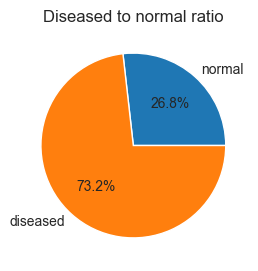

In [3]:
import matplotlib.pyplot as plt

total_size = diseased.shape[0] + normal.shape[0]
diseased_percent = diseased.shape[0] / total_size
normal_percent = normal.shape[0] / total_size
plt.figure(figsize=(3,3))
plt.pie([normal_percent, diseased_percent], labels=["normal", "diseased"], autopct='%1.1f%%')

plt.title("Diseased to normal ratio")
plt.show()

In [4]:
import pandas as pd

cell_type = "microglial cell"
results = {}

for name,data in [("diseased", diseased), ("normal", normal)]:

    cell = data[data["cell_type"] == cell_type]
    cell_names = list(cell.index)
    ids = adata.obs_names.get_indexer(cell_names)

    df = pd.DataFrame(adata.X[ids].toarray(), columns = adata.var.feature_name)
    mean_expression = df.mean(axis=0)

    expression_to_gene = {v:k for k,v in mean_expression.items()}
    sorted_expression = sorted(expression_to_gene.keys(), reverse=True)

    genes = []
    for i in range(10):
        genes.append(expression_to_gene[sorted_expression[i]])

    results[name] = genes

pd.DataFrame(results)

,diseased,normal
0,MALAT1,MALAT1
1,PLXDC2,PLXDC2
2,DOCK4,DOCK4
3,LRMDA,FRMD4A
4,FRMD4A,LRMDA
5,NEAT1,NEAT1
6,ARHGAP24,ARHGAP24
7,MEF2A,SRGAP2
8,ELMO1,MEF2A
9,ST6GAL1,CHST11


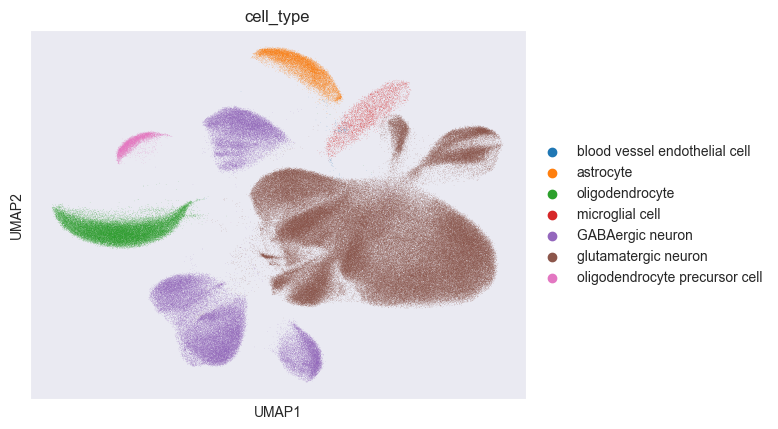

In [5]:
import scanpy as sc

sc.pl.umap(adata, color=['cell_type'])

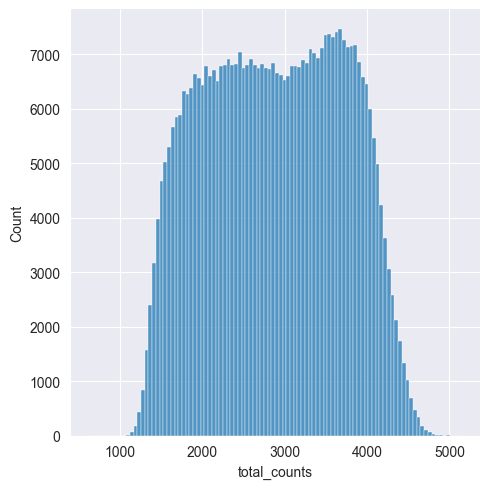

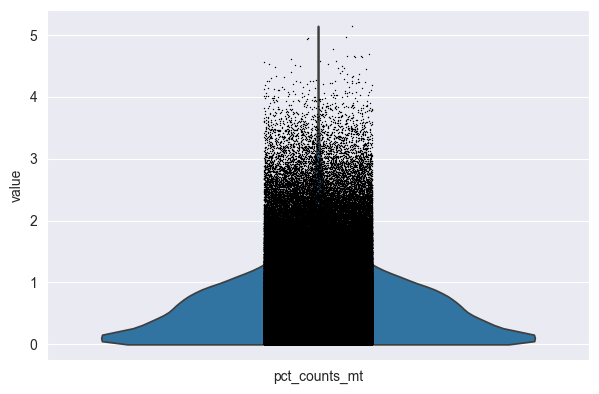

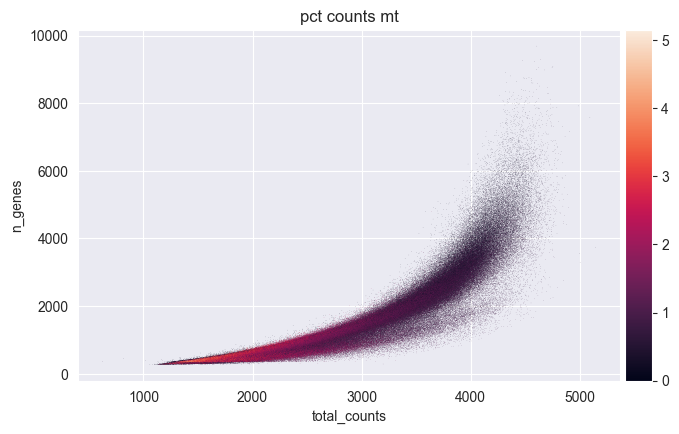

In [6]:
import seaborn as sns

p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes", color='pct_counts_mt')

In [7]:
cell_type = "glutamatergic neuron"
cell = adata.obs[adata.obs["cell_type"] == cell_type]
cell_names = list(cell.index)
ids = adata.obs_names.get_indexer(cell_names)

selected_cells = adata.X[ids]

In [8]:
mean_expression = selected_cells.mean(axis=0)

In [17]:
mean_expression_df = pd.DataFrame(mean_expression, columns = adata.var.feature_name)

In [38]:
sc.pp.highly_variable_genes(adata)

In [39]:
adata.var["highly_variable"][adata.var["highly_variable"]]

ENSEMBLE GENE
ENSG00000142611    True
ENSG00000171621    True
ENSG00000230021    True
ENSG00000142583    True
ENSG00000162496    True
                   ... 
ENSG00000184991    True
ENSG00000229238    True
ENSG00000092377    True
ENSG00000165246    True
ENSG00000231535    True
Name: highly_variable, Length: 4626, dtype: bool

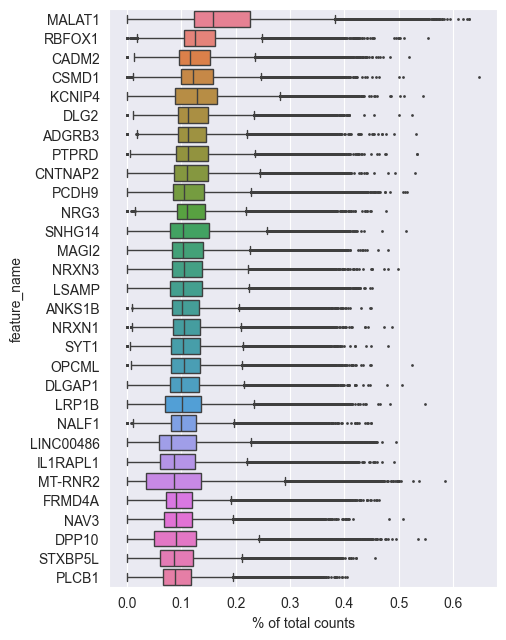

In [12]:
genes = sc.pl.highest_expr_genes(adata, gene_symbols="feature_name")

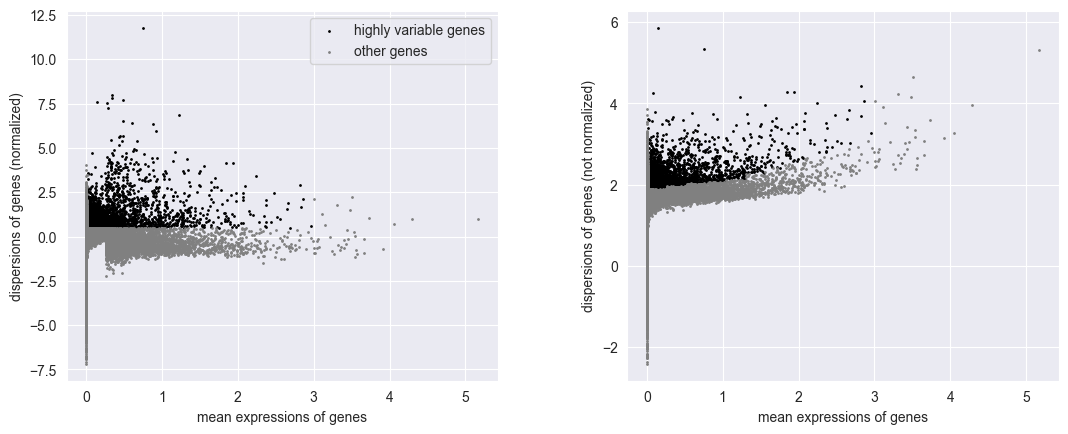

In [40]:
sc.pl.highly_variable_genes(adata)

In [36]:
adata.var

,mt,ribo,hb,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSEMBLE GENE,,,,,,,,,
ENSG00000186827,False,False,False,False,TNFRSF4,NCBITaxon:9606,gene,1039,protein_coding
ENSG00000186891,False,False,False,False,TNFRSF18,NCBITaxon:9606,gene,789,protein_coding
ENSG00000160072,False,False,False,False,ATAD3B,NCBITaxon:9606,gene,3300,protein_coding
ENSG00000260179,False,False,False,False,ENSG00000260179,NCBITaxon:9606,gene,1558,lncRNA
ENSG00000234396,False,False,False,False,ENSG00000234396,NCBITaxon:9606,gene,326,lncRNA
...,...,...,...,...,...,...,...,...,...
ENSG00000271254,False,False,False,False,ENSG00000271254,NCBITaxon:9606,gene,2922,protein_coding
ENSG00000275987,False,False,False,False,U1,NCBITaxon:9606,gene,144,snRNA
ENSG00000268674,False,False,False,False,ENSG00000268674,NCBITaxon:9606,gene,510,protein_coding


In [31]:
set(adata.var["feature_type"])

{'IG_C_gene',
 'IG_C_pseudogene',
 'IG_D_gene',
 'IG_J_gene',
 'IG_J_pseudogene',
 'IG_V_gene',
 'IG_V_pseudogene',
 'IG_pseudogene',
 'Mt_rRNA',
 'Mt_tRNA',
 'TEC',
 'TR_C_gene',
 'TR_D_gene',
 'TR_J_gene',
 'TR_J_pseudogene',
 'TR_V_gene',
 'TR_V_pseudogene',
 'artifact',
 'lncRNA',
 'miRNA',
 'misc_RNA',
 'processed_pseudogene',
 'protein_coding',
 'pseudogene',
 'rRNA',
 'rRNA_pseudogene',
 'ribozyme',
 'sRNA',
 'scRNA',
 'scaRNA',
 'snRNA',
 'snoRNA',
 'transcribed_processed_pseudogene',
 'transcribed_unitary_pseudogene',
 'transcribed_unprocessed_pseudogene',
 'translated_processed_pseudogene',
 'unitary_pseudogene',
 'unprocessed_pseudogene',
 'vault_RNA'}

In [33]:
adata.obs

,APOE_class,Brain.Region,SORT,Braak.stage,Disease.Group,Amyloid,Brain.weight,PMI.hr.,Race,Age,...,NP.Diagonis,tissue_type,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
AGTACCATCCATCTGC-C0060,E2/E4,Frontal Cx (BA9),All Nuclei,IV,int,DP (C0),1370.0,unknown,nan,71,...,AD,tissue,astrocyte,10x 3' v3,Alzheimer disease,male,Brodmann (1909) area 9,unknown,71-year-old stage,;H|J`@{xnY
ACATCAGTCTTTAGTC-C0018,E3/E3,Frontal Cx (BA9),All Nuclei,II,low,No,1480.0,19.5,nan,61,...,PART,tissue,astrocyte,10x 3' v2,normal,male,Brodmann (1909) area 9,unknown,61-year-old stage,JQP1;<W}tH
CCAATCCAGAATAGGG-C0018,E3/E3,Frontal Cx (BA9),All Nuclei,II,low,No,1480.0,19.5,nan,61,...,PART,tissue,astrocyte,10x 3' v2,normal,male,Brodmann (1909) area 9,unknown,61-year-old stage,Q3`kwi_dnf
CTAGCCTAGCGTTTAC-C0018,E3/E3,Frontal Cx (BA9),All Nuclei,II,low,No,1480.0,19.5,nan,61,...,PART,tissue,astrocyte,10x 3' v2,normal,male,Brodmann (1909) area 9,unknown,61-year-old stage,QG4U-WyR#w
CTGAAACGTCCCTACT-C0018,E3/E3,Frontal Cx (BA9),All Nuclei,II,low,No,1480.0,19.5,nan,61,...,PART,tissue,astrocyte,10x 3' v2,normal,male,Brodmann (1909) area 9,unknown,61-year-old stage,tcM-x)<@#d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTACCTGGCACA-D0011,E3/E3,Frontal Cx (BA9),NeuN,II,low,No,1480.0,19.5,nan,61,...,PART,tissue,GABAergic neuron,Drop-seq,normal,male,Brodmann (1909) area 9,unknown,61-year-old stage,rSUikMm1HA
GCCTGTGCCGGG-D0203,E3/E3,Frontal Cx (BA9),NeuN,I,low,No,nan,3.75,black,68,...,PART,tissue,GABAergic neuron,Drop-seq,normal,male,Brodmann (1909) area 9,African American,68-year-old stage,VkfaWs`zG1
TTCTAGTGTCACTACA-C0081,E3/E4,Frontal Cx (BA9),NeuN,V,high,C3,950.0,15.8,nan,87,...,AD,tissue,GABAergic neuron,10x 3' v3,Alzheimer disease,female,Brodmann (1909) area 9,unknown,87-year-old stage,MvQ=Al?cqe
CATCGTCCATCTCCCA-C0105,E3/E3,Frontal Cx (BA9),NeuN,IV,int,C1,nan,7.5,nan,73,...,AD,tissue,GABAergic neuron,10x 3' v3,Alzheimer disease,male,Brodmann (1909) area 9,unknown,73-year-old stage,^-muzl|$EG


In [41]:
adata.var

,mt,ribo,hb,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,highly_variable,means,dispersions,dispersions_norm
ENSEMBLE GENE,,,,,,,,,,,,,
ENSG00000186827,False,False,False,False,TNFRSF4,NCBITaxon:9606,gene,1039,protein_coding,False,1.098793e-02,1.741654,0.249348
ENSG00000186891,False,False,False,False,TNFRSF18,NCBITaxon:9606,gene,789,protein_coding,False,1.575862e-02,1.733693,0.235111
ENSG00000160072,False,False,False,False,ATAD3B,NCBITaxon:9606,gene,3300,protein_coding,False,2.626370e-01,1.784558,-0.256838
ENSG00000260179,False,False,False,False,ENSG00000260179,NCBITaxon:9606,gene,1558,lncRNA,False,1.006771e-03,1.692330,0.161142
ENSG00000234396,False,False,False,False,ENSG00000234396,NCBITaxon:9606,gene,326,lncRNA,False,1.873151e-02,1.686862,0.151364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000271254,False,False,False,False,ENSG00000271254,NCBITaxon:9606,gene,2922,protein_coding,False,4.634504e-02,1.796044,0.346614
ENSG00000275987,False,False,False,False,U1,NCBITaxon:9606,gene,144,snRNA,False,6.680933e-05,1.564251,-0.067902
ENSG00000268674,False,False,False,False,ENSG00000268674,NCBITaxon:9606,gene,510,protein_coding,False,2.342287e-05,0.613372,-1.768362


In [59]:
adata

AnnData object with n_obs × n_vars = 424528 × 61427
    obs: 'APOE_class', 'Brain.Region', 'SORT', 'Braak.stage', 'Disease.Group', 'Amyloid', 'Brain.weight', 'PMI.hr.', 'Race', 'Age', 'RIN', 'total_counts', 'pct_counts_mt', 'droplet_FDR', 'doublefinder', 'n_genes', 'sample', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'donor_id', 'Age_group', 'PMI_group', 'RIN_group', 'Major_celltypes', 'Author_Annotation', 'NP.Diagonis', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'mt', 'ribo', 'hb', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Author_Annotati

In [68]:
pd.set_option('display.max_columns', None)

adata.obs.iloc[:5]

,APOE_class,Brain.Region,SORT,Braak.stage,Disease.Group,Amyloid,Brain.weight,PMI.hr.,Race,Age,RIN,total_counts,pct_counts_mt,droplet_FDR,doublefinder,n_genes,sample,tissue_ontology_term_id,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,self_reported_ethnicity_ontology_term_id,disease_ontology_term_id,sex_ontology_term_id,is_primary_data,suspension_type,donor_id,Age_group,PMI_group,RIN_group,Major_celltypes,Author_Annotation,NP.Diagonis,tissue_type,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
AGTACCATCCATCTGC-C0060,E2/E4,Frontal Cx (BA9),All Nuclei,IV,int,DP (C0),1370.0,unknown,nan,71,4.7,4184.6753,0.144776,0.000136,0,3272.0,C0060,UBERON:0013540,EFO:0009922,CL:0000127,HsapDv:0000165,unknown,MONDO:0004975,PATO:0000384,True,nucleus,19,70 to 80,unknown,4.2 to 5,Astrocytes,Astrocyte-GFAP-OSMR,AD,tissue,astrocyte,10x 3' v3,Alzheimer disease,male,Brodmann (1909) area 9,unknown,71-year-old stage,;H|J`@{xnY
ACATCAGTCTTTAGTC-C0018,E3/E3,Frontal Cx (BA9),All Nuclei,II,low,No,1480.0,19.5,nan,61,6.5,2703.6460,0.565152,0.000000,0,999.0,C0018,UBERON:0013540,EFO:0009899,CL:0000127,HsapDv:0000155,unknown,PATO:0000461,PATO:0000384,True,nucleus,50,less than 70,15.2 to 19.5 hours,6.1 to 7,Astrocytes,Astrocyte-SLC1A2-WIF1,PART,tissue,astrocyte,10x 3' v2,normal,male,Brodmann (1909) area 9,unknown,61-year-old stage,JQP1;<W}tH
CCAATCCAGAATAGGG-C0018,E3/E3,Frontal Cx (BA9),All Nuclei,II,low,No,1480.0,19.5,nan,61,6.5,2393.7102,0.752405,0.000000,0,729.0,C0018,UBERON:0013540,EFO:0009899,CL:0000127,HsapDv:0000155,unknown,PATO:0000461,PATO:0000384,True,nucleus,50,less than 70,15.2 to 19.5 hours,6.1 to 7,Astrocytes,Astrocyte-SLC1A2-SMTN,PART,tissue,astrocyte,10x 3' v2,normal,male,Brodmann (1909) area 9,unknown,61-year-old stage,Q3`kwi_dnf
CTAGCCTAGCGTTTAC-C0018,E3/E3,Frontal Cx (BA9),All Nuclei,II,low,No,1480.0,19.5,nan,61,6.5,2582.0920,0.106748,0.000000,0,792.0,C0018,UBERON:0013540,EFO:0009899,CL:0000127,HsapDv:0000155,unknown,PATO:0000461,PATO:0000384,True,nucleus,50,less than 70,15.2 to 19.5 hours,6.1 to 7,Astrocytes,Astrocyte-SLC1A2-WIF1,PART,tissue,astrocyte,10x 3' v2,normal,male,Brodmann (1909) area 9,unknown,61-year-old stage,QG4U-WyR#w
CTGAAACGTCCCTACT-C0018,E3/E3,Frontal Cx (BA9),All Nuclei,II,low,No,1480.0,19.5,nan,61,6.5,2497.0735,0.352070,0.000000,0,769.0,C0018,UBERON:0013540,EFO:0009899,CL:0000127,HsapDv:0000155,unknown,PATO:0000461,PATO:0000384,True,nucleus,50,less than 70,15.2 to 19.5 hours,6.1 to 7,Astrocytes,Astrocyte-SLC1A2-SMTN,PART,tissue,astrocyte,10x 3' v2,normal,male,Brodmann (1909) area 9,unknown,61-year-old stage,tcM-x)<@#d


In [74]:
adata.obs["Amyloid"]

AGTACCATCCATCTGC-C0060    DP (C0)
ACATCAGTCTTTAGTC-C0018         No
CCAATCCAGAATAGGG-C0018         No
CTAGCCTAGCGTTTAC-C0018         No
CTGAAACGTCCCTACT-C0018         No
                           ...   
CTACCTGGCACA-D0011             No
GCCTGTGCCGGG-D0203             No
TTCTAGTGTCACTACA-C0081         C3
CATCGTCCATCTCCCA-C0105         C1
CCATGCGGAATT-D0082             C3
Name: Amyloid, Length: 424528, dtype: category
Categories (5, object): ['C1', 'C2', 'C3', 'DP (C0)', 'No']

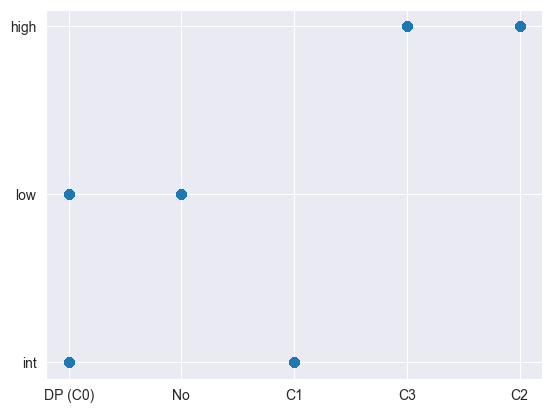

In [73]:
import matplotlib.pyplot as plt
plt.scatter(adata.obs["Amyloid"], adata.obs["Disease.Group"])

In [58]:
excitatory_data = adata[adata.obs['cell_type'] == "glutamatergic neuron"].copy()
